## Setting the environment

To calculate over the dataset we used Python environment containing Numpy and Pandas.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

## Input

Deltas file was used as an input

In [2]:
dfdelta = pd.read_csv("13_12-0deltas.csv")

In [3]:
dfdelta.shape

(8474077, 5)

In [4]:
dfdelta.head(5)

,asset_id,delta_minute,delta_reactions,delta_comments,delta_views
0,19779063,4203.0,4.0,0.0,188.0
1,19591453,5646.0,0.0,0.0,0.0
2,18959298,7098.0,7.0,0.0,0.0
3,18907487,7097.0,5.0,0.0,0.0
4,19833665,4203.0,0.0,0.0,0.0


asset_id, delta_minute and delta_reactions are important for further calculations. delta_comments and delta_views should be deleted.

In [5]:
dfdelta = dfdelta.drop(columns = ['delta_comments', 'delta_views'])

NaN values should be deleted, too.

In [6]:
dfdelta = dfdelta.dropna()

In [20]:
dfdelta = dfdelta.sort_values(by=['delta_reactions'],  ascending=False)

All plots at one image, plots are not separated from each other.

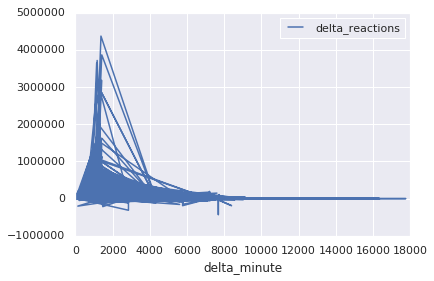

In [7]:
dfdelta.plot(x='delta_minute', y='delta_reactions')

In [8]:
dfmean = dfdelta.groupby(['delta_minute']).mean()

In [9]:
dfmean.head(5)

,asset_id,delta_reactions
delta_minute,,
0.0,2.122253e+07,114.349036
1.0,2.129642e+07,485.021497
2.0,2.125279e+07,199.963570
3.0,2.133309e+07,32.944828
4.0,2.131475e+07,14.691943


The plot is drawing an average line for all delta_reactions through delta_minute.

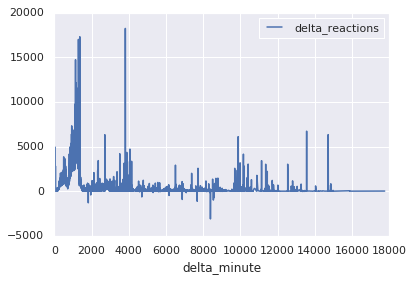

In [10]:
dfmean.reset_index().plot(x='delta_minute', y='delta_reactions')

In [11]:
dfmean.reset_index().head(5)

,delta_minute,asset_id,delta_reactions
0,0.0,2.122253e+07,114.349036
1,1.0,2.129642e+07,485.021497
2,2.0,2.125279e+07,199.963570
3,3.0,2.133309e+07,32.944828
4,4.0,2.131475e+07,14.691943


>> <font color="blue">
To define time series you can measure your parameters at these timepoints: 
Hours:
hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10
Days:
day1, day2, day3, day4, day5, day6, day7, day8, day9, day10
where:
hour1 = 60minutes
and
day1 = 1440 minutes.
With current data for each asset_id you have 1 - 100 measures, and much better for further calculations is to do the same measuring for each asset_id
</font>